<a href="https://colab.research.google.com/github/tpyte001/comput_phy/blob/main/Final_Project_PHY411.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Using Newton's second law and law of gravitation, we obtain:

$$ m \frac{d^2 \vec{r}}{dt^2} = - \left( \frac{G M m}{r^2} \right) \frac{\vec{r}}{r} $$

After canceling m, the x component and the y components can be represented as follows: $ \frac{d^2x}{dt^2} = - \frac{Gm}{r^3}x $ and $ \frac{d^2y}{dt^2} = - \frac{Gm}{r^3}y $. 

Since $ \frac{d^2x}{dt^2} $ and $\frac{d^2y}{dt^2}$ can be expressed as $ \frac{d}{dt}(\frac{dx}{dt}) $ and $ \frac{d}{dt}(\frac{dy}{dt})$ 

we can let $ \frac{dx}{dt} = V_x$ and $\frac{dy}{dt} = V_y $.

Expressing $ \frac{dx}{dt}$ and $\frac{dy}{dt}$ in this way allows us to represent our 2nd order component equations as 4 first order component equations:

$ \frac{dx}{dt} = V_x $,
$ \frac{dy}{dt} = V_y $,
$ \frac{dV_x}{dt} = - \frac{Gm}{r^3}x $,
$ \frac{dV_y}{dt} = - \frac{Gm}{r^3}y $.

Which in turn allows us to evaluate them numerically with the Runge-Kutta 4th Order method. 

First we will evaluate these equations with a static step size, which will allow us to approximate an orbit. However, it won't be the most accurate. As the comet approaches the sun, the accelration due to gravity increases, and everything moves faster. This implies that using a fixed step size can miss out on the details, as alot happens in a short amount of time. Conversely, when the comet is further away from the sun and moving slowly, very little happens in a long amount of time, so using a fixed step size may provide to much detail. The curvature of the elliptical orbit while the comet is far from the sun is closer to zero, meaning the comet is traveling more or less along a straight line. When this is the case we can use larger step sizes in order to save on computation time. Because of the lack of curvature, the approximation will still be mostly accurate. These problems will be addressed later on with an adaptive Runge Kutta 4th Order (RK4) Scheme.

## RK4 Static Scheme

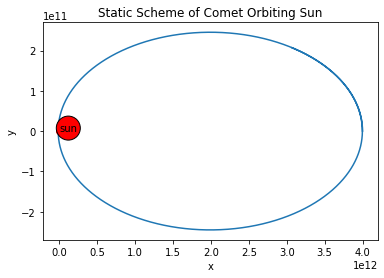

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = 4*(10**12) # m
y = 0          # m
vx = 0         # m/s
vy = 500       # m/s

# M = mass of sun
M = 1.9989e30     # kg 

# G = Newtons gravitational constant
G = 6.67430e-11   # N*m**2/kg**2

def f(rvec, t):
  x = rvec[0]
  y = rvec[1]
  vx = rvec[2]
  vy = rvec[3]
  r = (x**2 + y**2)**0.5
  f_x = vx
  f_y = vy
  f_vx = -G*M*(x/r**3)
  f_vy = -G*M*(y/r**3)
  fvec = np.array([f_x, f_y, f_vx, f_vy], float)
  return fvec
 

a = 0
b = 2 * 10 ** 9
N = 100000

rvec = [x,y,vx,vy]
  
h = (b-a)/N
tlist = np.arange(a,b,h)
xlist = []
ylist = []
vxlist = []
vylist = []
for t in tlist:
  xlist.append(rvec[0])
  ylist.append(rvec[1])
  vxlist.append(rvec[2])
  vylist.append(rvec[3])
  
  k1 = h * f(rvec,t) 
  k2 = h * f(rvec +.5*k1, t +.5*h)
  k3 = h * f(rvec + .5*k2, t + .5*h)
  k4 = h * f(rvec + k3, t+h)
  rvec = rvec + (1/6)*(k1 + (2*k2) + (2*k3) + k4)

plt.plot(xlist,ylist)
plt.plot(0,0, "o r")
plt.annotate("sun", xy=(0,0), bbox=dict(boxstyle="circle",fc="r"))
plt.title("Static Scheme of Comet Orbiting Sun")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## RK4 Dynamic Scheme

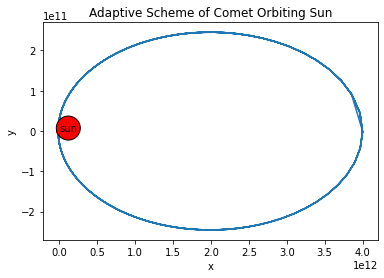

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Define initial values
x = 4*(10**12)        # m
y = 0                 # m
vx = 0                # m/s
vy = 500              # m/s
M = 1.9989e30         # kg # M = mass of sun
G = 6.67430e-11       # N*m**2/kg**2 # G = Newtons gravitational constant

### Function containing our 4 1st order diff equations, derived from original differential vector equation
def f(rvec, t): 
  x = rvec[0]
  y = rvec[1]
  vx = rvec[2]
  vy = rvec[3]
  r = (x**2 + y**2)**0.5
  f_x = vx
  f_y = vy
  f_vx = -G*M*(x/r**3)
  f_vy = -G*M*(y/r**3)
  fvec = np.array([f_x, f_y, f_vx, f_vy], float)
  return fvec


### RK4 Evaluation
def RK4(rvec,h):
  t=0
  k1 = h * f(rvec,t) 
  k2 = h * f(rvec + (k1/2), t + (h/2))
  k3 = h * f(rvec + (k2/2), t + (h/2))
  k4 = h * f(rvec + k3, t+h)
  rvec = rvec + (1/6)*(k1 + (2*k2) + (2*k3) + k4)
  return(rvec)

### initial step size, delta, and radius vector list
h = 1000                    #initial step size
delta = .001                #initial error tolerance
rvec = [x,y,vx,vy]          

t = 0                       #initial time
t_f = 2*(2*10**9)           #final time, amount of time for one orbit

xlist = []
ylist = []
tlist = []

"""
f0 = RK4(rvec,h) #RK4 with step size h
f1 = RK4(f0,h)   #RK4 with step size (2h) from time t + h
f2 = RK4(rvec, 2*h) #RK4 with step size (2h) from t = 0
xerror = (f1[0] - f2[0]) #/30 # evaluates x component of error
yerror = (f1[1] - f2[1]) #/30 # evaluates y component of error
combined_error = (np.sqrt(xerror**2+yerror**2)) #combined error
rho = 30*delta * h / combined_error
"""

while t < t_f:
# inital h choice input here
# Error calculation:
  
  f0 = RK4(rvec,h) #RK4 with step size h
  f1 = RK4(f0,h)   #RK4 with step size (2h) from time t + h
  f2 = RK4(rvec, 2*h) #RK4 with step size (2h) from t = 0
  xerror = (f1[0] - f2[0]) #/30 # evaluates x component of error
  yerror = (f1[1] - f2[1]) #/30 # evaluates y component of error
  combined_error = (np.sqrt(xerror**2+yerror**2)) #combined error
  rho = 30*delta * h / combined_error
  
  """
  try: #prevents division by 0
    rho = 30*delta * h / combined_error
  except RuntimeWarning:
    rho = 30*h*delta/(1**-10)
  """
  #print(rho)
  #if rho < 1: #our accuracy is poor, reevaluate from scratch with new h  

  while rho < 1:
    
    #h = h * rho ** (1/4)
    
    # Error calculation:
    f0 = RK4(rvec,h) #RK4 with step size h
    f1 = RK4(f0,h)   #RK4 with step size (2h) from time t + h
    f2 = RK4(rvec, 2*h) #RK4 with step size (2h) from t = 0
    xerror = (f1[0] - f2[0]) # evaluates x component of error
    yerror = (f1[1] - f2[1]) # evaluates y component of error
    combined_error = (np.sqrt(xerror**2+yerror**2)) #combined error
    rho = 30*delta * h / combined_error
    h = h * rho ** (1/4)

  rvec = f1
  tlist.append(t)   
  xlist.append(f1[0])
  ylist.append(f1[1])
  h = h * rho ** (1/4)
  t = t + h

plt.plot(xlist,ylist)
plt.plot(0,0, "o r")
plt.annotate("sun", xy=(0,0), bbox=dict(boxstyle="circle",fc="r"))
plt.title("Adaptive Scheme of Comet Orbiting Sun")
plt.xlabel('x')
plt.ylabel('y')
plt.show()
